# MetaData

*Coding and model development by* Michael B. McCarthy mbmccart@utica.edu

Article Title : Fairness–accuracy tradeoff: activation function choice in a neural network

DOI : 10.1007/s43681-022-00250-9

AIET-D-22-00158R1

in *AI and Ethics*

By 

Michael B. McCarthy

and

Sundaraparipurnan Narayanan  

sundar.narayanan@aitechethics.com

This experiment is built for Google's cloud-based Colab.  A libraries are !pip installed for each run.

Data stored in Google Drive.

V2 on 02Nov2021

V3 on 16NOV2021

V4 on 29NOV2021

V5, Added random seed control.  

V6 Stable and used for experiments. 

V7 == Copy of V6 and built for Adult Dataset

**Artifacts of the French dataset analysis linger in comments**

## Google Drive File

In [ ]:
#https://pypi.org/project/PyDrive/
import time
start = time.time()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
end = time.time()
print("The time of execution of above program is :", end-start)

The time of execution of above program is : 8.352676630020142


In [ ]:
start = time.time() #to meausure how long it takes

#authenticate users to have acces to google Drive.  Click the link to get the code.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

end = time.time()
print("The time of execution of above program is :", end-start)

The time of execution of above program is : 18.879209995269775


## Library Loading

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
#It is a function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline
# To remove the scientific notation from numpy arrays
#np.set_printoptions(suppress=True)

#Setting Seed for reproducable results (important to have tensorflow random seed set as well)
#https://datascience.stackexchange.com/questions/13314/causes-of-inconsistent-results-with-neural-network
np.random.seed(1)

# package for descriptive statistics
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## data wrangled outside this Python notebook via Alteryx Designer. 

# Source: Mabilama, J. M. (2020). E-commerce - Users of a C2C fashion store. [online] Data.world. 
# Available at: https://data.world/jfreex/e-commerce-users-of-a-french-c2c-fashion-store 

# Target Variable made for transactions (items bought or sold)
# outliers removed at 3 standard deviations above the mean
#   
#French Data Stratified Random Sample Jan 05, 2022 Random SEED == 47
"""
downloaded = drive.CreateFile({'id':'1BRlzi6jETpw66sDGB5Dhf53CkLp1zPtu'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2Train1.csv') 
downloaded = drive.CreateFile({'id':'1P-Z4qCWjuOyEOmoXRhZI6TpTnzNaPukL'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2CTEST1.csv')
"""
#French Data Stratified Random Sample Jan 10, 2022 Random SEED == 67
"""
downloaded = drive.CreateFile({'id':'1mOjfbmr7Vk3YqwpdbKlvfnXfMp1A8gJb'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2Train2.csv') 
downloaded = drive.CreateFile({'id':'1jVMKvdJVswMJj9S9wqSdWdoYw9IF_-XH'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2CTEST2.csv')
"""

#Source: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. 
#Available at: http://archive.ics.uci.edu/ml/datasets/Adult. 
#Irvine, CA: University of California, School of Information and Computer Science.

#Adult Data Stratified Random Sample Sep 01, 2022 Random SEED == 47
downloaded = drive.CreateFile({'id':'1BS36lcQO_gBbkgGv8Dx8teUqKX5BviDs'}) # replace the id with id of file you want to access
downloaded.GetContentFile('AdultTrain22Sep01.csv') 
downloaded = drive.CreateFile({'id':'1bARPD64nkvQAdc-WYQcMXMf1OW11Kzy3'}) # replace the id with id of file you want to access
downloaded.GetContentFile('AdultTEST22Sep01.csv')

In [ ]:
## read the training file
dfTrain = pd.read_csv('AdultTrain22Sep01.csv') 
print("Training Data: ",dfTrain.shape)

## read the TEST file
dfTEST = pd.read_csv("AdultTEST22Sep01.csv")
print("Testing Data: ",dfTEST.shape)
## show a sample of n records
#dfTrain.sample(10)
#dfTEST.sample(10)
# many "sex" and "education" variables included in dataset redundant (Multicoolinarity) removed because other variables in the analysis
dumpVar = ["sex_Female","sex_Male","education_10th",	"education_11th","education_12th","education_1st-4th","education_5th-6th","education_7th-8th",
                    "education_9th","education_Assoc-acdm","education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad",	
                    "education_Masters","education_Preschool","education_Prof-school","education_Some-college"]
dfTrain = dfTrain.drop(["sex_Female","sex_Male","education_10th",	"education_11th","education_12th","education_1st-4th","education_5th-6th","education_7th-8th",
                    "education_9th","education_Assoc-acdm","education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad",
                    "education_Masters","education_Preschool","education_Prof-school","education_Some-college"], axis=1) 
dfTEST = dfTEST.drop(["sex_Female","sex_Male","education_10th",	"education_11th","education_12th","education_1st-4th","education_5th-6th","education_7th-8th",
                    "education_9th","education_Assoc-acdm","education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad",
                    "education_Masters","education_Preschool","education_Prof-school","education_Some-college"], axis=1) 
## show the top 5 for Train
print("\n Training Data \n")
print(dfTrain.head())
#Displace the varaible types for Train
print(dfTrain.dtypes)
print(dfTrain.shape)
## show the top 5 for Testing
print("\n Testing Data \n")
print(dfTEST.head())
#Displace the varaible types for Testing
print(dfTEST.dtypes)
print(dfTEST.shape)

Training Data:  (31656, 106)
Testing Data:  (13566, 106)

 Training Data 

        age  capital_gain  capital_loss  education_num    fnlwgt  \
0  0.150685      0.000000           0.0       0.800000  0.219998   
1  0.273973      0.000000           0.0       0.866667  0.183552   
2  0.438356      0.000000           0.0       0.266667  0.099326   
3  0.191781      0.140841           0.0       0.866667  0.021863   
4  0.506849      0.000000           0.0       0.533333  0.195445   

   hours_per_week  workclass_Federal-gov  workclass_Local-gov  \
0        0.397959                      0                    0   
1        0.397959                      0                    0   
2        0.153061                      0                    0   
3        0.500000                      0                    0   
4        0.193878                      0                    0   

   workclass_Private  workclass_Self-emp-inc  ...  native_country_Scotland  \
0                  1                       0  .

In [ ]:
dfTrain

,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,Gender_Byte,target_bol
0,0.150685,0.000000,0.0,0.800000,0.219998,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.273973,0.000000,0.0,0.866667,0.183552,0.397959,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0.438356,0.000000,0.0,0.266667,0.099326,0.153061,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.191781,0.140841,0.0,0.866667,0.021863,0.500000,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
4,0.506849,0.000000,0.0,0.533333,0.195445,0.193878,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,0.602740,0.000000,0.0,0.533333,0.051590,0.479592,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
31652,0.191781,0.000000,0.0,0.533333,0.288872,0.397959,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
31653,0.424658,0.000000,0.0,0.866667,0.227325,0.397959,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
31654,0.369863,0.054551,0.0,0.800000,0.047666,0.397959,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
dfTrain["Gender_Byte"]

0        1
1        1
2        1
3        1
4        1
        ..
31651    0
31652    0
31653    0
31654    0
31655    0
Name: Gender_Byte, Length: 31656, dtype: int64

In [ ]:
#install fairlearn
#if installing on a local IDE (e.g., Jupyter), do not use the exclamation point 
!pip install fairlearn
#install modeling packages
!pip install tensorflow
!pip install -U scikit-learn
!pip install keras
import sklearn as sk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data File Wrangle

In [ ]:
# Separate Target Variable and Predictor Variables
# define variable to class: "target_bol"
#"target_bol" is a dictomous variable used to identify customers who stop using the company's services
TargetVariable=["target_bol"]
#it is VERY important that the list of variables matches the left to right order in the CSVs!
PredictorVariables=["age",	"capital_gain"	,"capital_loss",	"education_num"	,"fnlwgt",	"hours_per_week",	"workclass_Federal-gov",	
                    "workclass_Local-gov",	"workclass_Private",	"workclass_Self-emp-inc",	"workclass_Self-emp-not-inc",	"workclass_State-gov",	
                    "workclass_Without-pay",	"marital_status_Divorced",
                    "marital_status_Married-AF-spouse",	"marital_status_Married-civ-spouse",	"marital_status_Married-spouse-absent",	"marital_status_Never-married",
                    "marital_status_Separated",	"marital_status_Widowed",	"occupation_Adm-clerical",	"occupation_Armed-Forces",	"occupation_Craft-repair",	
                    "occupation_Exec-managerial",	"occupation_Farming-fishing",	"occupation_Handlers-cleaners",	"occupation_Machine-op-inspct",	"occupation_Other-service",
                    "occupation_Priv-house-serv",	"occupation_Prof-specialty",	"occupation_Protective-serv",	"occupation_Sales",	"occupation_Tech-support",
                    "occupation_Transport-moving",	"relationship_Husband",	"relationship_Not-in-family",	"relationship_Other-relative",	"relationship_Own-child",
                    "relationship_Unmarried",	"relationship_Wife"	,"race_Amer-Indian-Eskimo",	"race_Asian-Pac-Islander",	"race_Black",	"race_Other",	"race_White",
                    "native_country_Cambodia",	"native_country_Canada",	"native_country_China",	"native_country_Columbia",	
                    "native_country_Cuba",	"native_country_Dominican-Republic","native_country_Ecuador",	"native_country_El-Salvador",	"native_country_England",	
                    "native_country_France",	"native_country_Germany",	"native_country_Greece",	"native_country_Guatemala",	"native_country_Haiti",	"native_country_Holand-Netherlands",
                    "native_country_Honduras",	"native_country_Hong",	"native_country_Hungary",	"native_country_India",	"native_country_Iran",	"native_country_Ireland",
                    "native_country_Italy",	"native_country_Jamaica",	"native_country_Japan",	"native_country_Laos",	"native_country_Mexico",	"native_country_Nicaragua",
                    "native_country_Outlying-US(Guam-USVI-etc)",	"native_country_Peru",	"native_country_Philippines",	"native_country_Poland",	"native_country_Portugal",	
                    "native_country_Puerto-Rico",	"native_country_Scotland",	"native_country_South",	"native_country_Taiwan",	"native_country_Thailand",	"native_country_Trinadad&Tobago",
                    "native_country_United-States",	"native_country_Vietnam",	"native_country_Yugoslavia","Gender_Byte"]


In [ ]:
print(PredictorVariables)
count=0
for name in PredictorVariables:
  count +=1
print("There are "+str(count)+ " predictor variables.")

['age', 'capital_gain', 'capital_loss', 'education_num', 'fnlwgt', 'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'rela

## Descriptive Statistics

In [ ]:
print("dfTrain Predictor Variables")
rp.summary_cont(dfTrain[PredictorVariables])

dfTrain Predictor Variables




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,31656.0,0.2959,0.1818,0.0010,0.2939,0.2979
1,capital_gain,31656.0,0.0110,0.0745,0.0004,0.0102,0.0118
2,capital_loss,31656.0,0.0202,0.0928,0.0005,0.0192,0.0213
3,education_num,31656.0,0.6075,0.1700,0.0010,0.6056,0.6094
4,fnlwgt,31656.0,0.1196,0.0714,0.0004,0.1188,0.1204
...,...,...,...,...,...,...,...
82,native_country_Trinadad&Tobago,31656.0,0.0008,0.0275,0.0002,0.0005,0.0011
83,native_country_United-States,31656.0,0.9142,0.2800,0.0016,0.9111,0.9173
84,native_country_Vietnam,31656.0,0.0018,0.0428,0.0002,0.0014,0.0023
85,native_country_Yugoslavia,31656.0,0.0005,0.0218,0.0001,0.0002,0.0007


In [ ]:
print("dfTrain Target Variable")
rp.summary_cont(dfTrain[TargetVariable])

dfTrain Target Variable




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,target_bol,31656.0,0.2481,0.4319,0.0024,0.2433,0.2528


In [ ]:
print("dfTEST Predictor Variables")
rp.summary_cont(dfTEST[PredictorVariables])

dfTEST Predictor Variables




/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,13566.0,0.2935,0.1793,0.0015,0.2905,0.2966
1,capital_gain,13566.0,0.0110,0.0765,0.0007,0.0098,0.0123
2,capital_loss,13566.0,0.0206,0.0934,0.0008,0.0190,0.0222
3,education_num,13566.0,0.6088,0.1708,0.0015,0.6059,0.6117
4,fnlwgt,13566.0,0.1187,0.0719,0.0006,0.1175,0.1199
...,...,...,...,...,...,...,...
82,native_country_Trinadad&Tobago,13566.0,0.0001,0.0121,0.0001,-0.0001,0.0004
83,native_country_United-States,13566.0,0.9104,0.2856,0.0025,0.9056,0.9152
84,native_country_Vietnam,13566.0,0.0018,0.0429,0.0004,0.0011,0.0026
85,native_country_Yugoslavia,13566.0,0.0006,0.0243,0.0002,0.0002,0.0010


In [ ]:
print("dfTEST Target Variable")
rp.summary_cont(dfTEST[TargetVariable])

dfTEST Target Variable




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,target_bol,13566.0,0.2473,0.4315,0.0037,0.24,0.2546


In [ ]:
"""
Normally, random samples using 'from sklearn.model_selection import train_test_split'
identify training and testing data but, for repeatablility,
a static random stratified sample was made.
"""

#Training Data for X and y
print("X_Train Shape BEFORE Drop:\n",dfTrain.shape, "\n")
X_train = dfTrain.drop('target_bol',axis='columns')
print("X_Train Shape AFTER Drop:\n",X_train.shape, "\n")
#print("X_train head:\n")
#print(X_train.head())
y_train = dfTrain['target_bol']
print("y_train shape: \n",y_train.shape, "\n")
#print("y_train head:\n")
#print(y_train.head())

# Testing Data for X and y
X_test = dfTEST.drop('target_bol',axis='columns')
print("\nX_test shape: \n",X_test.shape,"\n")
#print("X_test head:\n")
#print(X_test.head())

y_test = dfTEST['target_bol']
print("y_test Shape:",y_test.shape,"\n")
#print("y_test Head:\n")
#print(y_test.head())

# Check shapes of training and testing datasets
assert(X_train.shape==(31656, 87))
assert(X_test.shape == (13566, 87))
print("Asserted X train and test dataframes")
print(X_train.shape)
print(X_test.shape)

#training data are rank one arrays that need to be reshaped 
y_train=y_train.values.reshape((31656,1))
y_test=y_test.values.reshape((13566,1))
print("Reshaped y train and test dataframes")
print(y_train.shape)
print(y_test.shape)


X_Train Shape BEFORE Drop:
 (31656, 88) 

X_Train Shape AFTER Drop:
 (31656, 87) 

y_train shape: 
 (31656,) 


X_test shape: 
 (13566, 87) 

y_test Shape: (13566,) 

Asserted X train and test dataframes
(31656, 87)
(13566, 87)
Reshaped y train and test dataframes
(31656, 1)
(13566, 1)


In [ ]:
print("\n X_test head: \n")
X_test.head()


 X_test head: 



,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,Gender_Byte
0,0.082192,0.0,0.0,0.800000,0.073654,0.295918,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.356164,0.0,0.0,0.866667,0.188694,0.448980,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.575342,0.0,0.0,0.533333,0.064678,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0.369863,0.0,0.0,0.866667,0.077772,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.109589,0.0,0.0,0.600000,0.012718,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
print("\n X_train head: \n")
X_train.head()


 X_train head: 



,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,Gender_Byte
0,0.150685,0.000000,0.0,0.800000,0.219998,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.273973,0.000000,0.0,0.866667,0.183552,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0.438356,0.000000,0.0,0.266667,0.099326,0.153061,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.191781,0.140841,0.0,0.866667,0.021863,0.500000,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.506849,0.000000,0.0,0.533333,0.195445,0.193878,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
"""

#Correlation Matrix
#This is currently run on only the X variables but should include the whole dataset (i.e., include the Y variable...the dependent variable)
start = time.time() #to meausure how long it takes
#this takes a long time....consider commenting out once you see the results.
sns.pairplot(data=X_train, hue="Gender_Byte")
plt.show() 

end = time.time()
print("\nThe time of execution of above program is :", end-start,"\n")

"""

'\n\n#Correlation Matrix\n#This is currently run on only the X variables but should include the whole dataset (i.e., include the Y variable...the dependent variable)\nstart = time.time() #to meausure how long it takes\n#this takes a long time....consider commenting out once you see the results.\nsns.pairplot(data=X_train, hue="Gender_Byte")\nplt.show() \n\nend = time.time()\nprint("\nThe time of execution of above program is :", end-start,"\n")\n\n'

# Activation Function Bias Analysis with FairLearn
The Prupose of this code is to assess the technical bias resulting from the 
activation function used in the **hidden** layer of a Neural Network

# Nueral Network Fairness Modeling 

In [ ]:
#Modeling
import tensorflow as tf
#
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# Set the random seed for repeatable results (important to have numpy random seed set as well)
tf.random.set_seed(1)
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score

from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate,false_positive_rate,true_positive_rate,count

#Identifying the initializer used in each layer; seed set to 4 to a Python integer. 
# "An initializer created with a given seed will always produce the same random tensor for a given shape and dtype." 
# https://keras.io/api/layers/initializers/#randomnormal-class
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=4)

## Relu Activation Function
rectified linear unit activation = ReLU

https://keras.io/api/layers/activations/#relu-function

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 4.2409 - accuracy: 0.6120
Epoch 2/30
124/124 [==============================] - 1s 6ms/step - loss: 0.8903 - accuracy: 0.7233
Epoch 3/30
124/124 [==============================] - 1s 7ms/step - loss: 0.6138 - accuracy: 0.7371
Epoch 4/30
124/124 [==============================] - 1s 8ms/step - loss: 0.5339 - accuracy: 0.7449
Epoch 5/30
124/124 [==============================] - 1s 6ms/step - loss: 0.4959 - accuracy: 0.7552
Epoch 6/30
124/124 [==============================] - 1s 6ms/step - loss: 0.4711 - accuracy: 0.7599
Epoch 7/30
124/124 [==============================] - 1s 5ms/step - loss: 0.4538 - accuracy: 0.7719
Epoch 8/30
124/124 [==============================] - 1s 5ms/step - loss: 0.4399 - accuracy: 0.7841
Epoch 9/30
124/124 [==============================] - 1s 6ms/step - loss: 0.4276 - accuracy: 0.7945
Epoch 10/30
124/124 [==============================] - 1s 6ms/step - loss: 0.4166 - accuracy: 0.8010

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56658a51d0>,
      dtype=object)

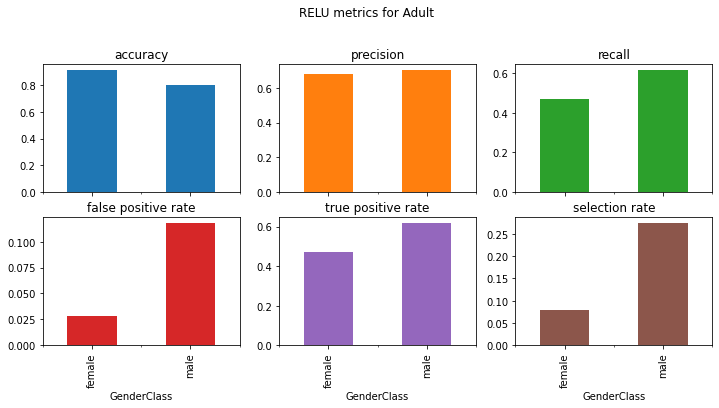

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/ 
### relu Activation function in all layers and sigmoid in output layer ###
model_relu = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
#model_relu.add(Dense(87, input_shape=(86,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
model_relu.add(Dense(88, input_dim=87, kernel_initializer=initializer, bias_initializer="zeros", activation='relu')) 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_relu.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# The output neuron is a single fully connected node 
#
model_relu.add(Dense(1, kernel_initializer=initializer,activation='sigmoid'))
 
# Compiling the model
model_relu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_relu.fit(X_train, y_train, batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_relu=model_relu.predict(X_test)

TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData.insert(len(df.columns), 'Churn', y_test.values)
#TestingData.assign(Churn=y_test)
TestingData["target_bol"]=y_test
TestingData['Predictedtarget_bolRelu']=Predictions_relu

#transform Predicted target_bol from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["Predictedtarget_bolReluClass"]= np.where(TestingData['Predictedtarget_bolRelu']>=0.5, 1, 0)
#print(y_test[:10])
print(y_test.dtype)
print(TestingData.sample(11))
model_relu.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_relu = MetricFrame(metrics=accuracy_score, y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolReluClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_relu.overall)

print("\n" "Model score by category: ")
print(gm_relu.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_relu = MetricFrame(metrics=selection_rate,y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolReluClass'], sensitive_features=TestingData['Gender_Byte'])
sr_relu.overall
print("1.0==female, 0.0==male")
sr_relu.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
TestingData["GenderClass"]= np.where(TestingData['Gender_Byte']==1, "female","male")
print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    } #'count': count Removed for Display 
metric_frame_relu = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolReluClass'],
                           sensitive_features=TestingData['GenderClass'])
metric_frame_relu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="RELU metrics for Adult",
)

# Gender variable DoubleCheck
Compare to make sure Gender Variable is properly identified.  The count should mat counted.

In [ ]:
rp.summary_cont(TestingData["Gender_Byte"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Gender_Byte,13566.0,0.3249,0.4684,0.004,0.317,0.3328


In [ ]:
rp.summary_cat(TestingData["Gender_Byte"])

,Variable,Outcome,Count,Percent
0,Gender_Byte,0.0,9158,67.51
1,,1.0,4408,32.49


In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,Gender_Byte,target_bol,Predictedtarget_bolRelu,Predictedtarget_bolReluClass,GenderClass
0,0.082192,0.0,0.0,0.800000,0.073654,0.295918,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.004254,0,female
1,0.356164,0.0,0.0,0.866667,0.188694,0.448980,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1,0.102725,0,female
2,0.575342,0.0,0.0,0.533333,0.064678,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.075300,0,female
3,0.369863,0.0,0.0,0.866667,0.077772,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.200859,0,female
4,0.109589,0.0,0.0,0.600000,0.012718,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.260027,0,female


## Tanh Activation Function

Hyperbolic tangent activation function.

https://keras.io/api/layers/activations/#tanh-function

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 1.5702 - accuracy: 0.3211
Epoch 2/30
124/124 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6089
Epoch 3/30
124/124 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7269
Epoch 4/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7479
Epoch 5/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7495
Epoch 6/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7502
Epoch 7/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.7506
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7509
Epoch 9/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.7514
Epoch 10/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.7521

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d5686690>,
      dtype=object)

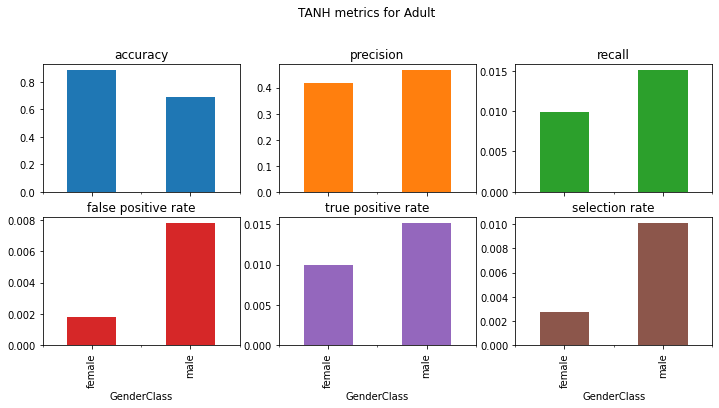

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/ 
### tanh Activation function in all layers and sigmoid in output layer ###
model_tanh = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_tanh.add(Dense(88, input_shape=(87,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_tanh.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros",activation='tanh'))
 
# The output neuron is a single fully connected node 
#
model_tanh.add(Dense(1, kernel_initializer=initializer,activation='sigmoid'))
 
# Compiling the model
model_tanh.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_tanh.fit(X_train, y_train ,batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_tanh=model_tanh.predict(X_test)

#TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData['target_bol']=y_test.values
TestingData['Predictedtarget_bolTanh']=Predictions_tanh

#transform Predicted target_bol from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["Predictedtarget_bolTanhClass"]= np.where(TestingData['Predictedtarget_bolTanh']>=0.5, 1, 0)
print(y_test.dtype)
print(TestingData.sample(11))
model_tanh.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_tanh = MetricFrame(metrics=accuracy_score, y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolTanhClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_tanh.overall)

print("\n" "Model score by category: ")
print(gm_tanh.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_tanh = MetricFrame(metrics=selection_rate,y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolTanhClass'], sensitive_features=TestingData['Gender_Byte'])
sr_tanh.overall
print("1.0==female, 0.0==male")
sr_tanh.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
#TestingData["GenderClass"]= np.where(TestingData['gender']>=1, "female","male")
#print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    } #'count': count Removed for Display
metric_frame_tanh = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolTanhClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_tanh.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="TANH metrics for Adult",
)

## Selu Activation Function

Scaled Exponential Linear Unit (SELU).

https://keras.io/api/layers/activations/#selu-function

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 1.6999 - accuracy: 0.6236
Epoch 2/30
124/124 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.7386
Epoch 3/30
124/124 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7824
Epoch 4/30
124/124 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7996
Epoch 5/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8086
Epoch 6/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8157
Epoch 7/30
124/124 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.8210
Epoch 8/30
124/124 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8229
Epoch 9/30
124/124 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8264
Epoch 10/30
124/124 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8284

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d5bc4c10>,
      dtype=object)

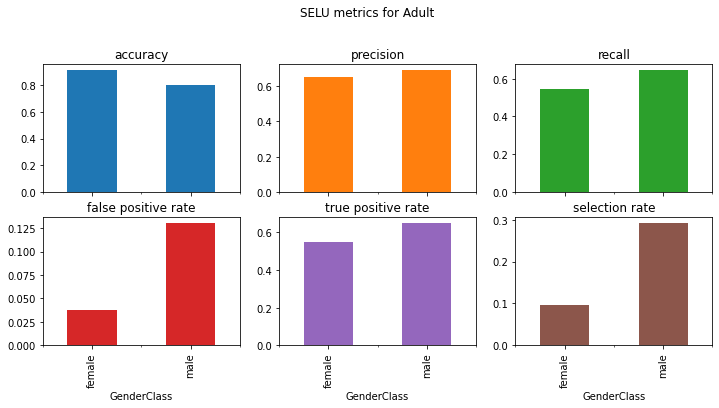

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/
### Selu Activation function in all layers and sigmoid in output layer ###
model_selu = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_selu.add(Dense(88, input_shape=(87,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_selu.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros", activation='selu'))
 
# The output neuron is a single fully connected node 
#
model_selu.add(Dense(1, kernel_initializer=initializer,activation='sigmoid'))
 
# Compiling the model
model_selu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_selu.fit(X_train, y_train ,batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_selu=model_selu.predict(X_test)

#TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData['target_bol']=y_test.values
TestingData['Predictedtarget_bolSelu']=Predictions_selu

#transform Predicted target_bol from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["Predictedtarget_bolSeluClass"]= np.where(TestingData['Predictedtarget_bolSelu']>=0.5, 1, 0)
print(y_test.dtype)
print(TestingData.sample(11))
model_selu.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_selu = MetricFrame(metrics=accuracy_score, y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolSeluClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_selu.overall)

print("\n" "Model score by category: ")
print(gm_selu.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_selu = MetricFrame(metrics=selection_rate,y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolSeluClass'], sensitive_features=TestingData['Gender_Byte'])
sr_selu.overall
print("1.0==female, 0.0==male")
sr_selu.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
#TestingData["GenderClass"]= np.where(TestingData['Gender_Byte']>=1, "female","male")
#print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    } #'count': count Removed for Display
metric_frame_selu = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolSeluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_selu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="SELU metrics for Adult",
)

## Elu Activation Function

Exponential Linear Unit.

https://keras.io/api/layers/activations/#elu-function

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 1.2633 - accuracy: 0.7228
Epoch 2/30
124/124 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7774
Epoch 3/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8064
Epoch 4/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8138
Epoch 5/30
124/124 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8184
Epoch 6/30
124/124 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8220
Epoch 7/30
124/124 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8258
Epoch 8/30
124/124 [==============================] - 0s 3ms/step - loss: 0.3697 - accuracy: 0.8267
Epoch 9/30
124/124 [==============================] - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8300
Epoch 10/30
124/124 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8316

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5659578910>,
      dtype=object)

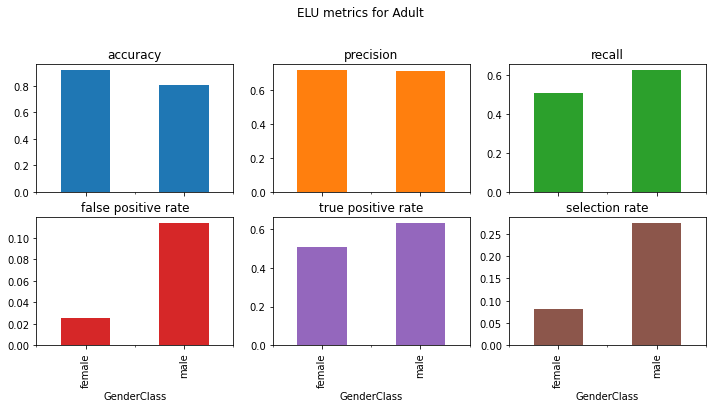

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/
### elu Activation function in all layers and sigmoid in output layer ###
model_elu = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_elu.add(Dense(88, input_shape=(87,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_elu.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros", activation='elu'))
 
# The output neuron is a single fully connected node 
#
model_elu.add(Dense(1, kernel_initializer=initializer, activation='sigmoid'))
 
# Compiling the model
model_elu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_elu.fit(X_train, y_train ,batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_elu=model_elu.predict(X_test)

#TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData['target_bol']=y_test.values
TestingData['Predictedtarget_bolElu']=Predictions_elu

#transform Predicted target_bol from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["Predictedtarget_bolEluClass"]= np.where(TestingData['Predictedtarget_bolElu']>=0.5, 1, 0)
print(y_test.dtype)
print(TestingData.sample(11))
model_elu.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_elu = MetricFrame(metrics=accuracy_score, y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolEluClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_elu.overall)

print("\n" "Model score by category: ")
print(gm_elu.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_elu = MetricFrame(metrics=selection_rate,y_true=TestingData['target_bol'], y_pred=TestingData['Predictedtarget_bolEluClass'], sensitive_features=TestingData['Gender_Byte'])
sr_elu.overall
print("1.0==female, 0.0==male")
sr_elu.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
#TestingData["GenderClass"]= np.where(TestingData['Gender_Byte']>=1, "female","male")
#print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    } #'count': count Removed for Display
metric_frame_elu = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolEluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_elu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="ELU metrics for Adult",
)

In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,target_bol,Predictedtarget_bolRelu,Predictedtarget_bolReluClass,GenderClass,Predictedtarget_bolTanh,Predictedtarget_bolTanhClass,Predictedtarget_bolSelu,Predictedtarget_bolSeluClass,Predictedtarget_bolElu,Predictedtarget_bolEluClass
0,0.082192,0.0,0.0,0.800000,0.073654,0.295918,0.0,0.0,1.0,0.0,...,0,0.004254,0,female,0.049143,0,0.007428,0,0.007255,0
1,0.356164,0.0,0.0,0.866667,0.188694,0.448980,0.0,0.0,0.0,0.0,...,1,0.102725,0,female,0.049143,0,0.284276,0,0.207561,0
2,0.575342,0.0,0.0,0.533333,0.064678,0.397959,0.0,0.0,1.0,0.0,...,0,0.075300,0,female,0.049143,0,0.062846,0,0.014497,0
3,0.369863,0.0,0.0,0.866667,0.077772,0.397959,0.0,0.0,1.0,0.0,...,0,0.200859,0,female,0.049143,0,0.189343,0,0.294756,0
4,0.109589,0.0,0.0,0.600000,0.012718,0.397959,0.0,0.0,1.0,0.0,...,0,0.260027,0,female,0.542987,1,0.215329,0,0.308165,0


# Fairlearn Metrics

## Overall Model Metrics

In [ ]:
print ("Relu\n", metric_frame_relu.overall, 
      "\n\nTanh\n", metric_frame_tanh.overall,
      "\n\nSelu\n", metric_frame_selu.overall,
      "\n\nElu\n", metric_frame_elu.overall,
      #"\n\nExponential\n", metric_frame_exponential.overall,
      "\n")


Relu
 accuracy               0.836798
precision              0.700527
recall                 0.594039
false positive rate    0.083439
true positive rate     0.594039
selection rate         0.209715
dtype: object 

Tanh
 accuracy               0.752101
precision              0.461538
recall                 0.014307
false positive rate    0.005484
true positive rate     0.014307
selection rate         0.007666
dtype: object 

Selu
 accuracy                0.83783
precision              0.687318
recall                 0.631595
false positive rate    0.094408
true positive rate     0.631595
selection rate         0.227259
dtype: object 

Elu
 accuracy               0.843506
precision              0.715385
recall                 0.609836
false positive rate    0.079718
true positive rate     0.609836
selection rate         0.210821
dtype: object 



## By Group Metrics

In [ ]:
print("Relu       =", metric_frame_relu.by_group.to_dict(),"\n")
#print("Sigmoid    =", metric_frame_sigmoid.by_group.to_dict(),"\n")
#print("Softmax    =", metric_frame_softmax.by_group.to_dict(),"\n")
#print("Softplus   =", metric_frame_softplus.by_group.to_dict(),"\n")
#print("Softsign   =", metric_frame_softsign.by_group.to_dict(),"\n")
print("Tanh       =", metric_frame_tanh.by_group.to_dict(),"\n")
print("Selu       =", metric_frame_selu.by_group.to_dict(),"\n")
print("Elu        =", metric_frame_elu.by_group.to_dict(),"\n")
#print("Exponential=", metric_frame_exponential.by_group.to_dict(),"\n")

Relu       = {'accuracy': {'female': 0.9144736842105263, 'male': 0.799410351605154}, 'precision': {'female': 0.6810344827586207, 'male': 0.7032438926712055}, 'recall': {'female': 0.4711729622266402, 'male': 0.6157082748948106}, 'false positive rate': {'female': 0.028425096030729832, 'male': 0.11750713606089438}, 'true positive rate': {'female': 0.4711729622266402, 'male': 0.6157082748948106}, 'selection rate': {'female': 0.07894736842105263, 'male': 0.27265778554269493}} 

Tanh       = {'accuracy': {'female': 0.8854355716878403, 'male': 0.6879231273203756}, 'precision': {'female': 0.4166666666666667, 'male': 0.4673913043478261}, 'recall': {'female': 0.009940357852882704, 'male': 0.015077138849929873}, 'false positive rate': {'female': 0.001792573623559539, 'male': 0.007770377418331748}, 'true positive rate': {'female': 0.009940357852882704, 'male': 0.015077138849929873}, 'selection rate': {'female': 0.0027223230490018148, 'male': 0.010045861541821358}} 

Selu       = {'accuracy': {'fem

In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,Predictedtarget_bolReluClass,GenderClass,Predictedtarget_bolTanh,Predictedtarget_bolTanhClass,Predictedtarget_bolSelu,Predictedtarget_bolSeluClass,Predictedtarget_bolElu,Predictedtarget_bolEluClass,Predictedtarget_bolExponential,Predictedtarget_bolExponentialClass
0,0.082192,0.0,0.0,0.800000,0.073654,0.295918,0.0,0.0,1.0,0.0,...,0,female,0.049143,0,0.007428,0,0.007255,0,NaN,0
1,0.356164,0.0,0.0,0.866667,0.188694,0.448980,0.0,0.0,0.0,0.0,...,0,female,0.049143,0,0.284276,0,0.207561,0,NaN,0
2,0.575342,0.0,0.0,0.533333,0.064678,0.397959,0.0,0.0,1.0,0.0,...,0,female,0.049143,0,0.062846,0,0.014497,0,NaN,0
3,0.369863,0.0,0.0,0.866667,0.077772,0.397959,0.0,0.0,1.0,0.0,...,0,female,0.049143,0,0.189343,0,0.294756,0,NaN,0
4,0.109589,0.0,0.0,0.600000,0.012718,0.397959,0.0,0.0,1.0,0.0,...,0,female,0.542987,1,0.215329,0,0.308165,0,NaN,0


All Graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f565a39ec50>,
      dtype=object)

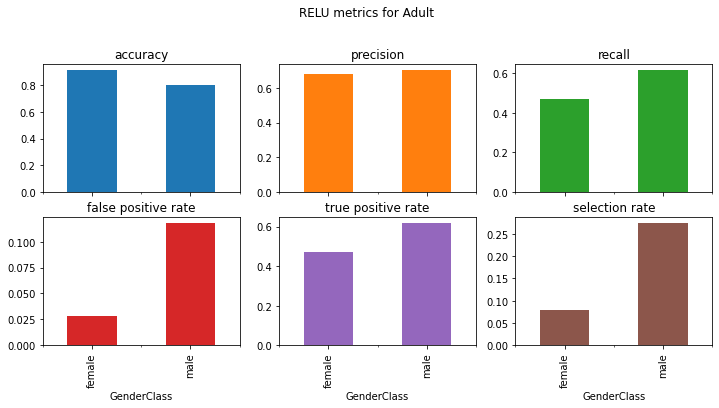

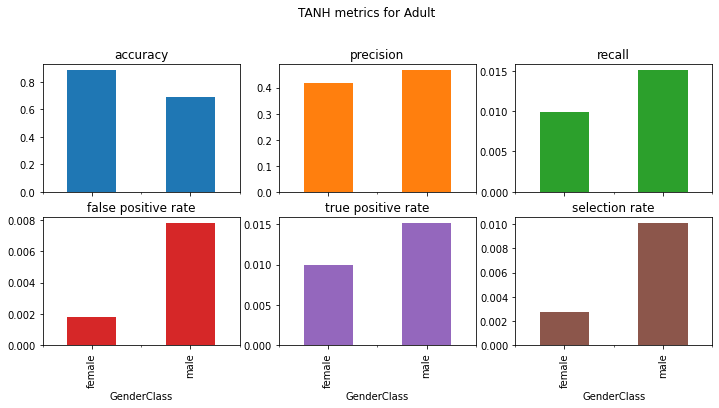

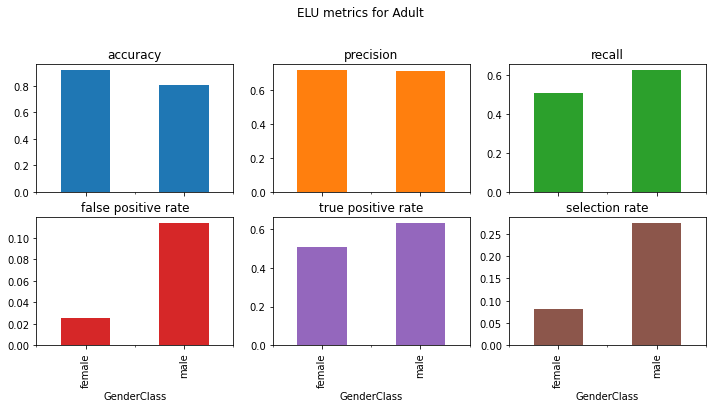

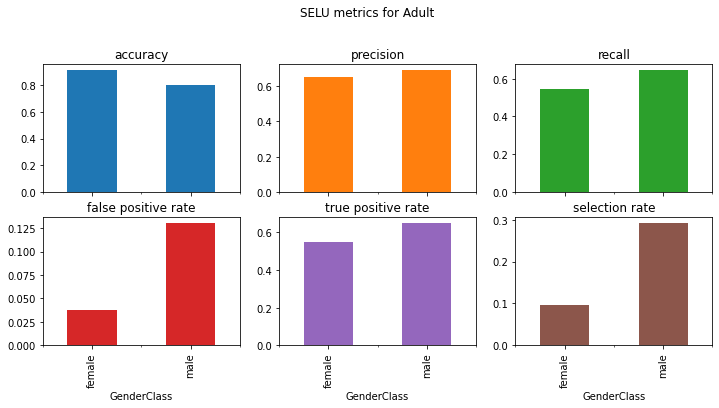

In [ ]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    } #'count': count Removed for Display
#Relu
metric_frame_relu = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolReluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_relu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="RELU metrics for Adult",
)
#Tanh
metric_frame_tanh = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolTanhClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_tanh.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="TANH metrics for Adult",
)

#ELU
metric_frame_elu = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolEluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_elu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="ELU metrics for Adult",
)
#Selu
metric_frame_selu = MetricFrame(metrics=metrics,
                           y_true=TestingData['target_bol'],
                           y_pred=TestingData['Predictedtarget_bolSeluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_selu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="SELU metrics for Adult",
)

# Gender variable DoubleCheck
Compare to make sure Gender Variable is properly identified.  The count should mat counted.

In [ ]:
rp.summary_cont(TestingData["Gender_Byte"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Gender_Byte,13566.0,0.3249,0.4684,0.004,0.317,0.3328


In [ ]:
rp.summary_cat(TestingData["Gender_Byte"])

,Variable,Outcome,Count,Percent
0,Gender_Byte,0.0,9158,67.51
1,,1.0,4408,32.49


In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,Predictedtarget_bolReluClass,GenderClass,Predictedtarget_bolTanh,Predictedtarget_bolTanhClass,Predictedtarget_bolSelu,Predictedtarget_bolSeluClass,Predictedtarget_bolElu,Predictedtarget_bolEluClass,Predictedtarget_bolExponential,Predictedtarget_bolExponentialClass
0,0.082192,0.0,0.0,0.800000,0.073654,0.295918,0.0,0.0,1.0,0.0,...,0,female,0.049143,0,0.007428,0,0.007255,0,NaN,0
1,0.356164,0.0,0.0,0.866667,0.188694,0.448980,0.0,0.0,0.0,0.0,...,0,female,0.049143,0,0.284276,0,0.207561,0,NaN,0
2,0.575342,0.0,0.0,0.533333,0.064678,0.397959,0.0,0.0,1.0,0.0,...,0,female,0.049143,0,0.062846,0,0.014497,0,NaN,0
3,0.369863,0.0,0.0,0.866667,0.077772,0.397959,0.0,0.0,1.0,0.0,...,0,female,0.049143,0,0.189343,0,0.294756,0,NaN,0
4,0.109589,0.0,0.0,0.600000,0.012718,0.397959,0.0,0.0,1.0,0.0,...,0,female,0.542987,1,0.215329,0,0.308165,0,NaN,0
